In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df.iloc[:, 2:]

In [5]:
df.sample(5)

,Age,EstimatedSalary,Purchased
294,35,57000,0
325,41,60000,0
141,18,68000,0
293,37,77000,0
127,26,32000,0


### Train - Test split

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop("Purchased", axis = 1), df["Purchased"], test_size= 0.3, random_state= 0)


In [7]:
X_train.shape, X_test.shape

((280, 2), (120, 2))

### StandardScaler

from sklearn

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

### fit the scaler to the train set, it will learn the parameters

scaler.fit(X_train)

### transform train and test sets

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [10]:

X_train.head()

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000


In [11]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [12]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns= X_test.columns)

In [13]:
X_train_scaled.head()

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047


In [14]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [15]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


In [16]:
X_train.describe()

,Age,EstimatedSalary
count,280.000000,280.000000
mean,37.864286,69807.142857
std,10.218201,34641.201654
min,18.000000,15000.000000
25%,30.000000,43000.000000
50%,37.000000,70500.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


### Effects of Scaling

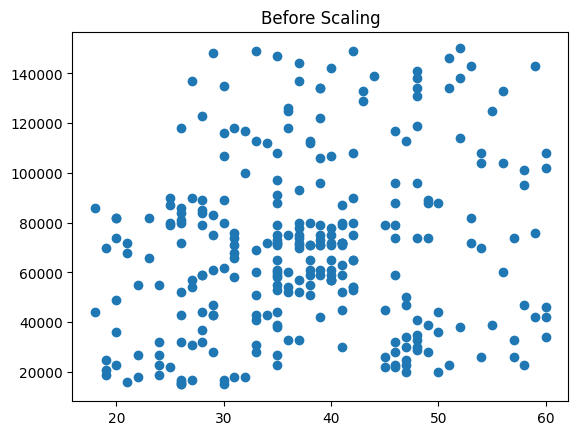

In [17]:
plt.scatter(X_train["Age"], X_train["EstimatedSalary"])
plt.title("Before Scaling")

plt.show()

Text(0.5, 1.0, 'Afer Scaling')

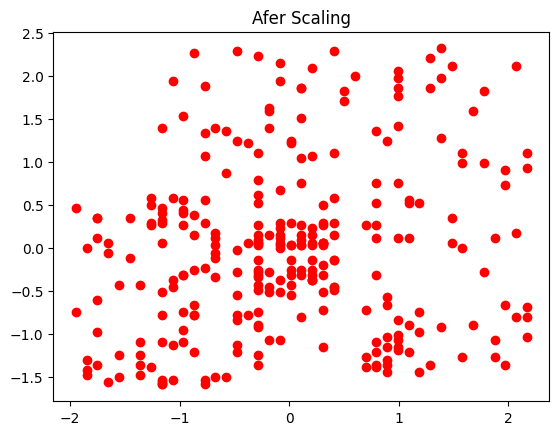

In [18]:
plt.scatter(X_train_scaled["Age"], X_train_scaled["EstimatedSalary"], color = "red")
plt.title("Afer Scaling")

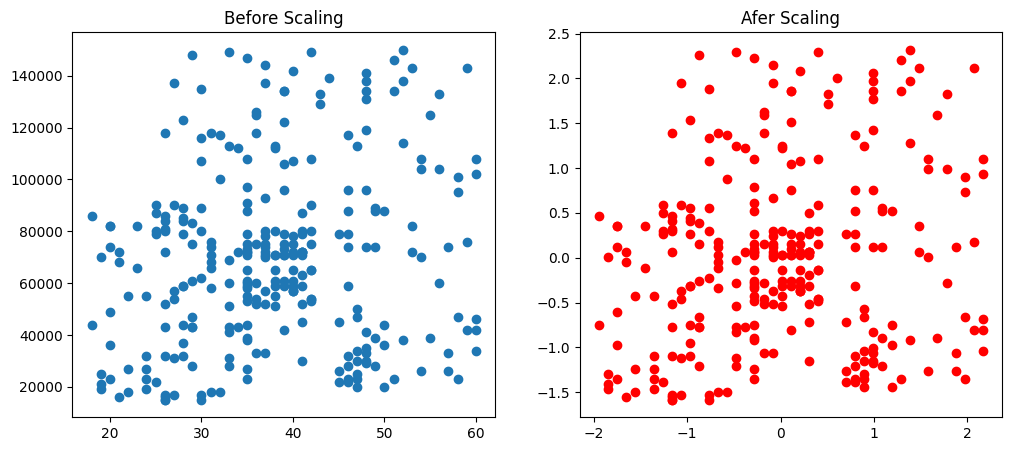

In [19]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,5))

ax1.scatter(X_train["Age"], X_train["EstimatedSalary"])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled["Age"], X_train_scaled["EstimatedSalary"], color = "red")
ax2.set_title("Afer Scaling")
plt.show()

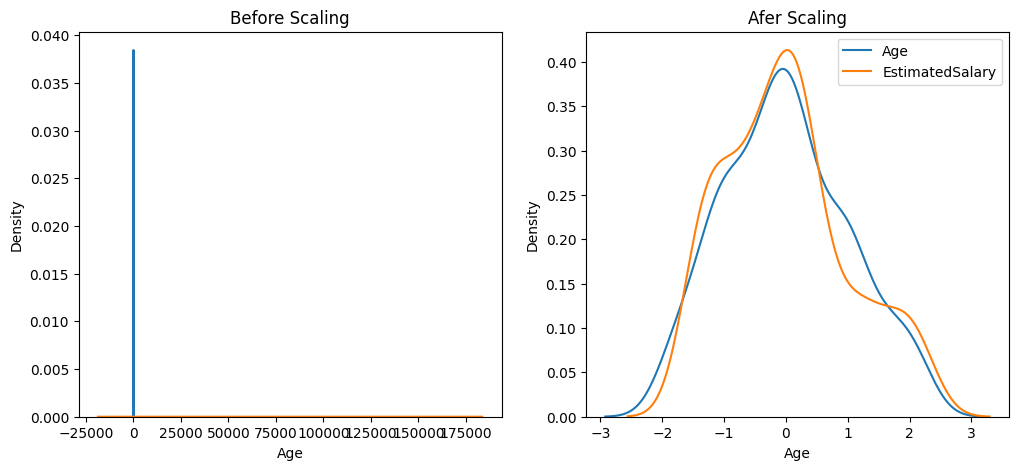

In [20]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,5))

### before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train["Age"], ax = ax1, label = "Age")
sns.kdeplot(X_train["EstimatedSalary"], ax = ax1, label = "EstimatedSalary")

### after scaling
ax2.set_title("Afer Scaling")
sns.kdeplot(X_train_scaled["Age"], ax = ax2, label = "Age")
sns.kdeplot(X_train_scaled["EstimatedSalary"], ax = ax2, label = "EstimatedSalary")
plt.legend()
plt.show()

### comparisons of distributions

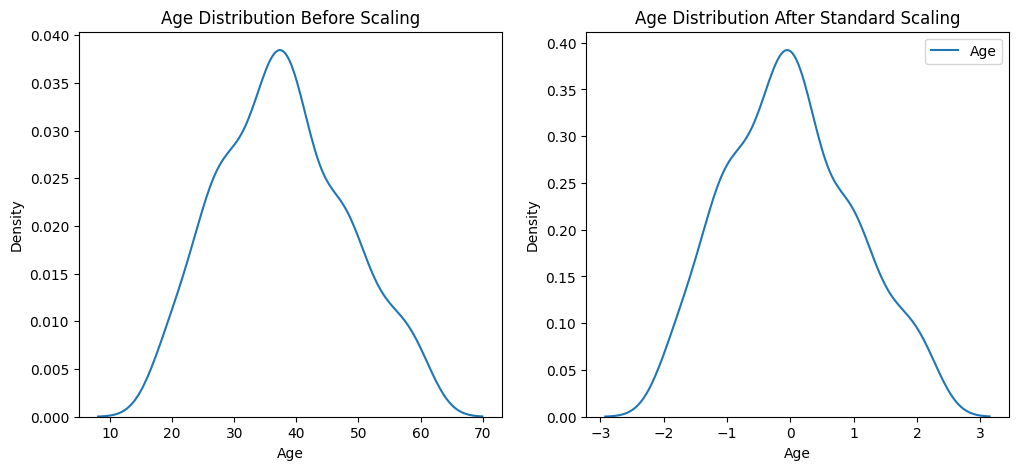

In [21]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,5))

### before scaling
ax1.set_title("Age Distribution Before Scaling")
sns.kdeplot(X_train["Age"], ax = ax1, label = "Age")


### after scaling
ax2.set_title("Age Distribution After Standard Scaling")
sns.kdeplot(X_train_scaled["Age"], ax = ax2, label = "Age")
plt.legend()
plt.show()

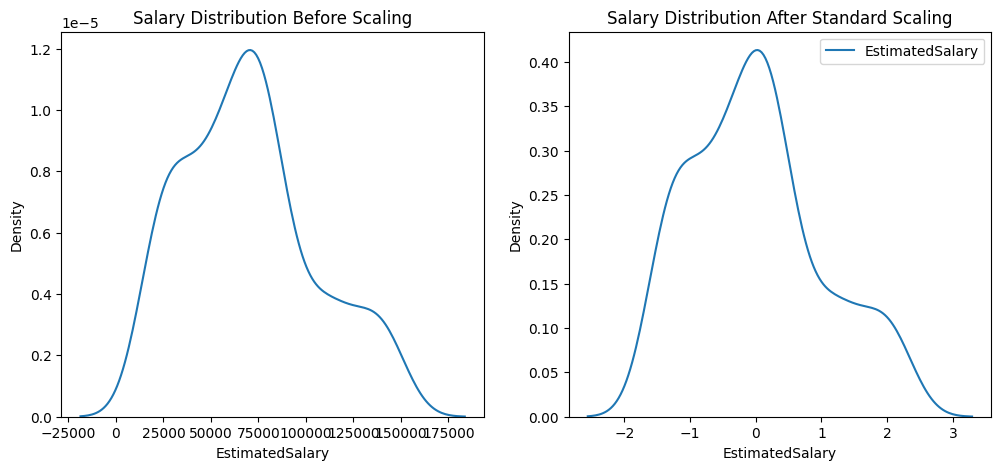

In [22]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,5))

### before scaling
ax1.set_title("Salary Distribution Before Scaling")
sns.kdeplot(X_train["EstimatedSalary"], ax = ax1, label = "EstimatedSalary")



### after scaling
ax2.set_title("Salary Distribution After Standard Scaling")
sns.kdeplot(X_train_scaled["EstimatedSalary"], ax = ax2, label = "EstimatedSalary")
plt.legend()
plt.show()

### Why scaling is important

In [23]:
from sklearn.linear_model import LogisticRegression


In [24]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [25]:
lr.fit(X_train,Y_train)
lr_scaled.fit(X_train_scaled,Y_train)

LogisticRegression()

In [26]:
y_pred =    lr.predict(X_test)
y_pred_scaled =    lr_scaled.predict(X_test_scaled)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
print("Actual", accuracy_score(Y_test, y_pred))
print("Scaled", accuracy_score(Y_test, y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


In [29]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [34]:
dt.fit(X_train,Y_train)
dt_scaled.fit(X_train_scaled,Y_train)

DecisionTreeClassifier()

In [35]:
y_pred = dt.predict(X_test)
y_pred_scaled =  dt_scaled.predict(X_test_scaled)

In [36]:
print("Actual", accuracy_score(Y_test, y_pred))
print("Scaled", accuracy_score(Y_test, y_pred_scaled))

Actual 0.875
Scaled 0.875


In [37]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


### Effect of   Outlier

In [38]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

C:\Users\psure\AppData\Local\Temp\ipykernel_19584\2365817244.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)


In [39]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

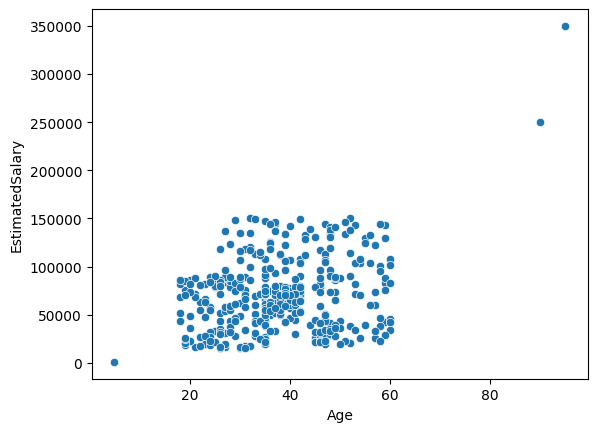

In [40]:
sns.scatterplot(data = df, x = "Age", y = "EstimatedSalary")

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

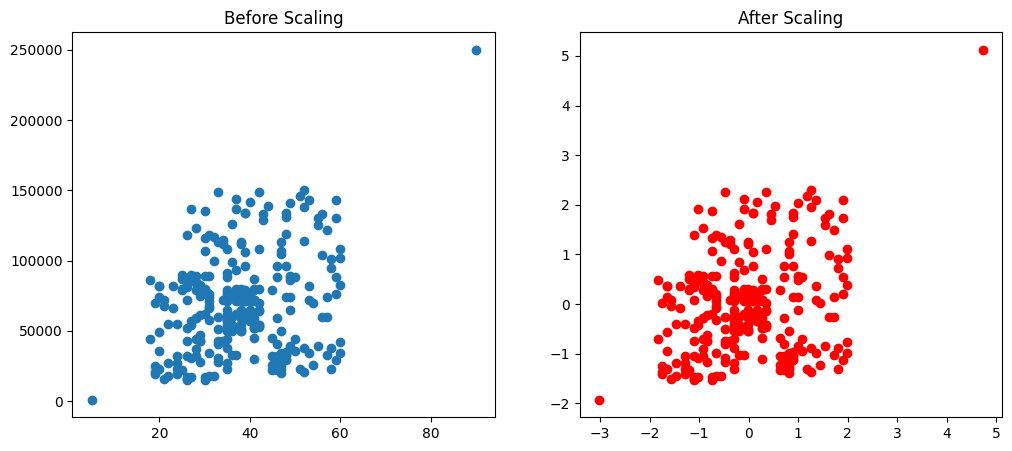

In [47]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()